In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, requests, re
import tweepy
import string
import requests 
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import preprocessor as p
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elfan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Business Understanding

Pada Final Project ini, saya memilih keyword yaitu 'resesi'. Keyword 'resesi' saat ini menjadi hot topic karena berkaitan dengan banyaknya berita dan analisa dari expert bahwa 2023 akan gelap karena resesi. dengan itu saya ingin melihat dan melakukan analisis terkait positif & negatif word yang ada isu resesi ini terjadi.

In [14]:
#membaca token twitter
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.Client(bearer_token=bearer_token,wait_on_rate_limit=True)
tokens.keys()

dict_keys(['bearer_token', 'api_key', 'api_key_secret', 'access_token', 'access_token_secret'])

In [34]:
#membuat variable words
words = 'resesi' 
max = 10000
tweets = []

tweet_response = tweepy.Paginator(api.search_recent_tweets,query=words,start_time='2022-11-07T00:00:01Z' ,end_time='2022-11-12T23:59:00Z', max_results = 100).flatten(limit=max)

for tweet in tweet_response:
  tweets.append(tweet.text.strip())

In [37]:
#memasukan hasil tweet ke dalam dataframe
df = pd.DataFrame(tweets)
df.rename(columns={0:'title'},inplace=True)
df.head(10)

,title
0,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni..."
1,RT @jokowi: Executive Chairman World Economic ...
2,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni..."
3,RT @produkbaguss: Takut resesi 2023? Investasi...
4,Ubedilah Badrun mengemukakan bahwa korupsi yan...
5,RT @produkbaguss: Takut resesi 2023? Investasi...
6,RT @SoftWarNews: Rusia telah menciptakan situa...
7,RT @produkbaguss: Takut resesi 2023? Investasi...
8,RT @produkbaguss: Takut resesi 2023? Investasi...
9,Rusia telah menciptakan situasi di dunia yang ...


In [41]:
#membuat array kosong untuk menampung
news_9 = []
news_10 = []
news_11 = []
news_12 = []

#membuat fungsi read news dari kompas
def kompas(date, news):
    pages = list(range(1,100))
    for page in pages:
        response = requests.get('https://indeks.kompas.com/?site=all&date={}&page={}'.format(date,page)).text
        soup = BeautifulSoup(response,'html.parser') 
        desc = soup.find_all('a' , class_='article__link')
        for i in range(len(desc)):
            news.append(desc[i].text)
    return news



In [43]:
#menjalankan fungsi ambil berita kompas
kompas('2022-11-09', news_9)
kompas('2022-11-10', news_10)
kompas('2022-11-11', news_11)
kompas('2022-11-12', news_12)

['Hasil Liverpool Vs Southampton: Darwin Nunez 2 Gol, The Reds Menang 3-1',
 'Hasil Tottenham Vs Leeds: Drama 7 Gol, Bentancur Jadi Pahlawan',
 'Sejarah Hari Kesehatan Nasional 12 November',
 'Raffi Ahmad Menang Tenis Lawan Desta',
 '3 Fakta Trofi Emas Piala Dunia: Jerman Pengoleksi Terbanyak',
 'Hasil Napoli Vs Udinese 3-2, Tangis Deulofeu Iringi Kemenangan Tuan Rumah ',
 'Istri dari Pria yang Lompat di ITC Kuningan Masih Syok, Belum Dimintai Keterangan',
 'Jokowi Bertemu Sekjen PBB dan Presiden Dewan Eropa di Phnom Penh',
 'Berapa Usia Hidup Rata-rata Kucing Rumahan? Begini Penjelasannya',
 'Cara Menghitung Poin Tenis Lapangan',
 'Anggota Parlemen Ukraina Kira Rudik Sebut Syarat Damai dengan Rusia',
 'Sejarah Kesehatan Masyarakat di Dunia',
 'Tubuh Tertancap Anak Panah, 2 Anggota Polisi Tetap Halau Warga yang Bentrok di Maluku Tenggara',
 'Gempa Magnitudo 5,4 Guncang Gorontalo Utara, Tidak Berpotensi Tsunami',
 'Jalan Sunyi Lamek Dowansiba, Tolak Jadi PNS demi Dirikan Rumah Baca Bagi

In [54]:
#memasukan hasil dari kompas ke dalam dataframe
news = news_9 + news_10 + news_11 + news_12
df_news = pd.DataFrame(news)
df_news.rename(columns={0:'title'},inplace=True)


#melakukan filter datafreame kompas dengan kata resesi
df_news = df_news[df_news['title'].str.contains("Resesi")]
df_news

,title
172,Paylater Disebut Dukung Penguatan Ekonomi di T...
452,Paylater Disebut Dukung Penguatan Ekonomi di T...
860,LPS: Data Pertumbuhan Ekonomi Bantah Pernyataa...
1001,"Ekonomi Tumbuh 5,72 Persen, KSP Sebut Pemerint..."
1099,"Lawan Resesi, Ribuan UMKM di Indonesia Merapat..."
1208,"Hadapi Resesi Global 2023, Tingkatkan Investas..."
1294,Upah Minimum 2023 Naik di Tengah Bayang-bayang...
1789,FEB UI Chief Economists Talk: Indonesia Akan B...
1950,Pefindo Optimistis Penyaluran Kredit Bakal Tum...
1989,"Demo di Balai Kota, Buruh Tolak PHK Massal den..."


In [55]:
#menggabungkan data twitter dan kompas
df_concat = pd.concat([df,df_news],axis=0)
df_concat

,title
0,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni..."
1,RT @jokowi: Executive Chairman World Economic ...
2,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni..."
3,RT @produkbaguss: Takut resesi 2023? Investasi...
4,Ubedilah Badrun mengemukakan bahwa korupsi yan...
...,...
1950,Pefindo Optimistis Penyaluran Kredit Bakal Tum...
1989,"Demo di Balai Kota, Buruh Tolak PHK Massal den..."
2004,Daftar Pekerjaan yang Bertahan dan Terancam Sa...
2428,Biden Optimistis AS Akan Terhindar dari Resesi...


In [56]:
#eksport dataframe ke csv file
df_concat.to_csv('news_resesi.csv', index=False)

In [69]:
#membaca file csv
df = pd.read_csv('news_resesi.csv')
df

,title
0,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni..."
1,RT @jokowi: Executive Chairman World Economic ...
2,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni..."
3,RT @produkbaguss: Takut resesi 2023? Investasi...
4,Ubedilah Badrun mengemukakan bahwa korupsi yan...
...,...
10008,Pefindo Optimistis Penyaluran Kredit Bakal Tum...
10009,"Demo di Balai Kota, Buruh Tolak PHK Massal den..."
10010,Daftar Pekerjaan yang Bertahan dan Terancam Sa...
10011,Biden Optimistis AS Akan Terhindar dari Resesi...


In [70]:
#membuat function preprocess
def preprocess(row):
    text = row['title']
    text = p.clean(text)
    return text

#menjalankan function preprocess
df['clean_title'] = df.apply(preprocess, axis=1)
df['clean_title'] = df['clean_title'].str.lower()
df['clean_title'] = df['clean_title'].str.replace('\d+', '')
df['clean_title'] = df['clean_title'].str.translate(str.maketrans("","",string.punctuation))
df['clean_title'] = df['clean_title'].str.replace('\n', '')
df['clean_title'] = df['clean_title'].str.replace('\t', '')
df['clean_title'] = df['clean_title'].str.replace(r'\b(\w{1,3})\b', '')
df

C:\Users\elfan\AppData\Local\Temp\ipykernel_15616\349992998.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_title'] = df['clean_title'].str.replace('\d+', '')
C:\Users\elfan\AppData\Local\Temp\ipykernel_15616\349992998.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_title'] = df['clean_title'].str.replace(r'\b(\w{1,3})\b', '')


,title,clean_title
0,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit kalau resesi yang bakal menimpa warga
1,RT @jokowi: Executive Chairman World Economic ...,executive chairman world economic forum prof...
2,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit kalau resesi yang bakal menimpa warga
3,RT @produkbaguss: Takut resesi 2023? Investasi...,takut resesi investasi emas udah solusi pali...
4,Ubedilah Badrun mengemukakan bahwa korupsi yan...,ubedilah badrun mengemukakan bahwa korupsi yan...
...,...,...
10008,Pefindo Optimistis Penyaluran Kredit Bakal Tum...,pefindo optimistis penyaluran kredit bakal tum...
10009,"Demo di Balai Kota, Buruh Tolak PHK Massal den...",demo balai kota buruh tolak massal dengan al...
10010,Daftar Pekerjaan yang Bertahan dan Terancam Sa...,daftar pekerjaan yang bertahan terancam saat ...
10011,Biden Optimistis AS Akan Terhindar dari Resesi...,biden optimistis akan terhindar dari resesi d...


In [71]:
#membersihkan kata stop words indonesian
indonesia = stopwords.words('indonesian')
indonesia = r'\b(?:{})\b'.format('|'.join(indonesia))
df['clean_title'] = df['clean_title'].str.replace(indonesia, '')
df

C:\Users\elfan\AppData\Local\Temp\ipykernel_15616\4161897449.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_title'] = df['clean_title'].str.replace(indonesia, '')


,title,clean_title
0,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit resesi menimpa warga
1,RT @jokowi: Executive Chairman World Economic ...,executive chairman world economic forum prof...
2,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit resesi menimpa warga
3,RT @produkbaguss: Takut resesi 2023? Investasi...,takut resesi investasi emas udah solusi ama...
4,Ubedilah Badrun mengemukakan bahwa korupsi yan...,ubedilah badrun mengemukakan korupsi merajal...
...,...,...
10008,Pefindo Optimistis Penyaluran Kredit Bakal Tum...,pefindo optimistis penyaluran kredit tumbuh ...
10009,"Demo di Balai Kota, Buruh Tolak PHK Massal den...",demo balai kota buruh tolak massal alasan r...
10010,Daftar Pekerjaan yang Bertahan dan Terancam Sa...,daftar pekerjaan bertahan terancam resesi
10011,Biden Optimistis AS Akan Terhindar dari Resesi...,biden optimistis terhindar resesi rencana ...


In [72]:
#membersihkan slank word
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['clean_title'] = df['clean_title'].apply(lambda x: stemmer.stem(x))
df

,title,clean_title
0,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit resesi timpa warga
1,RT @jokowi: Executive Chairman World Economic ...,executive chairman world economic forum profes...
2,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit resesi timpa warga
3,RT @produkbaguss: Takut resesi 2023? Investasi...,takut resesi investasi emas udah solusi aman t...
4,Ubedilah Badrun mengemukakan bahwa korupsi yan...,ubedilah badrun muka korupsi rajalela demokras...
...,...,...
10008,Pefindo Optimistis Penyaluran Kredit Bakal Tum...,pefindo optimistis salur kredit tumbuh potensi...
10009,"Demo di Balai Kota, Buruh Tolak PHK Massal den...",demo balai kota buruh tolak massal alas resesi...
10010,Daftar Pekerjaan yang Bertahan dan Terancam Sa...,daftar kerja tahan ancam resesi
10011,Biden Optimistis AS Akan Terhindar dari Resesi...,biden optimistis hindar resesi rencana ekonomi...


In [73]:
#menghapus duplikasi
print(f'Column before : {len(df)}')
df = df.drop_duplicates()
print(f'Column after : {len(df)}')

Column before : 10013
Column after : 2350


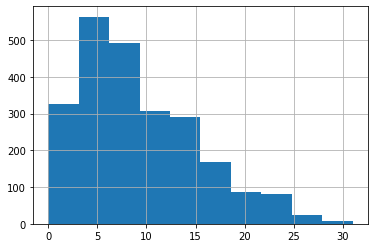

In [77]:
df['clean_title'].str.split().map(lambda x: len(x)).hist()
plt.show()

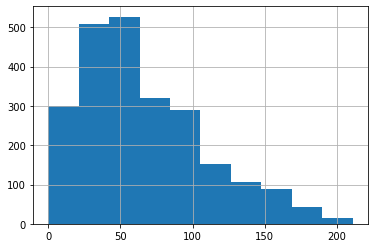

In [75]:
df['clean_title'].str.len().hist()
plt.show()

C:\Users\elfan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\elfan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


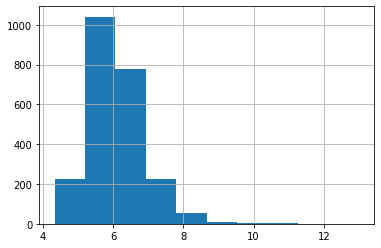

In [78]:
df['clean_title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

C:\Users\elfan\AppData\Local\Temp\ipykernel_15616\724082475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_token'] = df['clean_title'].apply(lambda x: nltk.word_tokenize(str(x)))


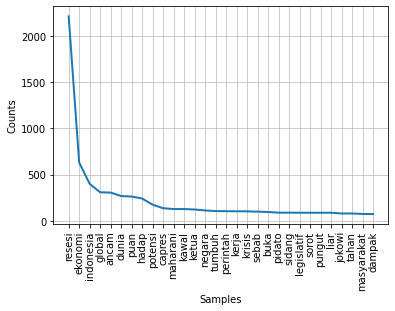

[('resesi', 2212), ('ekonomi', 631), ('indonesia', 401), ('global', 309), ('ancam', 306), ('dunia', 269), ('puan', 263), ('hadap', 242), ('potensi', 175), ('capres', 137), ('maharani', 128), ('kawal', 128), ('ketua', 123), ('negara', 113), ('tumbuh', 106), ('perintah', 105), ('kerja', 104), ('krisis', 103), ('sebab', 100), ('buka', 96), ('pidato', 89), ('sidang', 89), ('legislatif', 88), ('sorot', 88), ('pungut', 88), ('liar', 88), ('jokowi', 80), ('tahan', 80), ('masyarakat', 75), ('dampak', 74)]


In [79]:
df['clean_token'] = df['clean_title'].apply(lambda x: nltk.word_tokenize(str(x)))
topiks = [word for tweet in df['clean_token'] for word in tweet]
fqdist = FreqDist(topiks)
fqdist.plot(30,cumulative=False)
plt.show()
print(fqdist.most_common(30))

In [81]:
positive_word = open("./positive_word.txt","r")
positive_word = positive_word.readlines()
negative_word = open("./negative_word.txt","r")
negative_word = negative_word.readlines()  
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm', 'hajar']

In [85]:
results = []
items = df['clean_title'].tolist()
for item in items:
    print(item.strip())
    tweets = item.strip().split()

    count_positive = 0
    count_negative = 0

    for tweet in tweets:
        for word_p in positive_word:
            if word_p.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], word_p, ['negatif'])
                    count_negative += 1
                else:
                    print(word_p, ['positif'])
                    count_positive += 1
        for word_n in negative_word:
            if word_n.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], word_n, ['positif'])
                    count_positive += 1
                else:
                    print(word_n, ['negatif'])
                    count_negative += 1

    print ("positif: "+str(count_positive))
    print ("negatif: "+str(count_negative))
    results.append(count_positive - count_negative)

print ("Mean: "+str(np.mean(results)))
print ("Std: "+str(np.std(results)))

amitamit resesi timpa warga
resesi
 ['negatif']
positif: 0
negatif: 1
executive chairman world economic forum profesor klaus schwab hadir phnom penh temu penyelenggaraa
positif: 0
negatif: 0
amitamit resesi timpa warga
resesi
 ['negatif']
positif: 0
negatif: 1
takut resesi investasi emas udah solusi aman thread
takut
 ['negatif']
resesi
 ['negatif']
solusi
 ['positif']
aman
 ['positif']
positif: 2
negatif: 2
ubedilah badrun muka korupsi rajalela demokrasi memburukkepolisian percaya produksi regulasi kendali oligarki buruh terjadiresesi ekonomi picu gera protes masyarakat
korupsi
 ['negatif']
demokrasi
 ['positif']
percaya
 ['positif']
protes
 ['negatif']
positif: 2
negatif: 2
rusia cipta situasi dunia picu resesi inggris kepala menteri uang raja jeremy
resesi
 ['negatif']
positif: 0
negatif: 1
rusia cipta situasi dunia picu resesi inggris kepala menteri uang raja jeremy huntmencari kambing hitam
resesi
 ['negatif']
positif: 0
negatif: 1

positif: 0
negatif: 0
retensi inflasi dampak ber

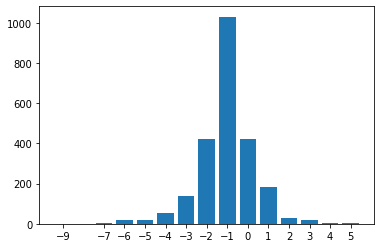

In [86]:
labels, counts = np.unique(results, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [87]:
df['sentiment'] = results
df

C:\Users\elfan\AppData\Local\Temp\ipykernel_15616\3425640571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = results


,title,clean_title,clean_token,sentiment
0,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit resesi timpa warga,"[amitamit, resesi, timpa, warga]",-1
1,RT @jokowi: Executive Chairman World Economic ...,executive chairman world economic forum profes...,"[executive, chairman, world, economic, forum, ...",0
2,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit resesi timpa warga,"[amitamit, resesi, timpa, warga]",-1
3,RT @produkbaguss: Takut resesi 2023? Investasi...,takut resesi investasi emas udah solusi aman t...,"[takut, resesi, investasi, emas, udah, solusi,...",0
4,Ubedilah Badrun mengemukakan bahwa korupsi yan...,ubedilah badrun muka korupsi rajalela demokras...,"[ubedilah, badrun, muka, korupsi, rajalela, de...",0
...,...,...,...,...
10008,Pefindo Optimistis Penyaluran Kredit Bakal Tum...,pefindo optimistis salur kredit tumbuh potensi...,"[pefindo, optimistis, salur, kredit, tumbuh, p...",1
10009,"Demo di Balai Kota, Buruh Tolak PHK Massal den...",demo balai kota buruh tolak massal alas resesi...,"[demo, balai, kota, buruh, tolak, massal, alas...",-2
10010,Daftar Pekerjaan yang Bertahan dan Terancam Sa...,daftar kerja tahan ancam resesi,"[daftar, kerja, tahan, ancam, resesi]",-1
10011,Biden Optimistis AS Akan Terhindar dari Resesi...,biden optimistis hindar resesi rencana ekonomi...,"[biden, optimistis, hindar, resesi, rencana, e...",0


In [88]:
def sentimental(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else: 
        return 'Neutral'

df['sentiment'] = df.apply(lambda x : sentimental(x.sentiment),axis=1)
df

C:\Users\elfan\AppData\Local\Temp\ipykernel_15616\4183708231.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df.apply(lambda x : sentimental(x.sentiment),axis=1)


,title,clean_title,clean_token,sentiment
0,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit resesi timpa warga,"[amitamit, resesi, timpa, warga]",Negative
1,RT @jokowi: Executive Chairman World Economic ...,executive chairman world economic forum profes...,"[executive, chairman, world, economic, forum, ...",Neutral
2,"Amit-amit Kalau RI Resesi, Ini yang Bakal Meni...",amitamit resesi timpa warga,"[amitamit, resesi, timpa, warga]",Negative
3,RT @produkbaguss: Takut resesi 2023? Investasi...,takut resesi investasi emas udah solusi aman t...,"[takut, resesi, investasi, emas, udah, solusi,...",Neutral
4,Ubedilah Badrun mengemukakan bahwa korupsi yan...,ubedilah badrun muka korupsi rajalela demokras...,"[ubedilah, badrun, muka, korupsi, rajalela, de...",Neutral
...,...,...,...,...
10008,Pefindo Optimistis Penyaluran Kredit Bakal Tum...,pefindo optimistis salur kredit tumbuh potensi...,"[pefindo, optimistis, salur, kredit, tumbuh, p...",Positive
10009,"Demo di Balai Kota, Buruh Tolak PHK Massal den...",demo balai kota buruh tolak massal alas resesi...,"[demo, balai, kota, buruh, tolak, massal, alas...",Negative
10010,Daftar Pekerjaan yang Bertahan dan Terancam Sa...,daftar kerja tahan ancam resesi,"[daftar, kerja, tahan, ancam, resesi]",Negative
10011,Biden Optimistis AS Akan Terhindar dari Resesi...,biden optimistis hindar resesi rencana ekonomi...,"[biden, optimistis, hindar, resesi, rencana, e...",Neutral


<AxesSubplot:>

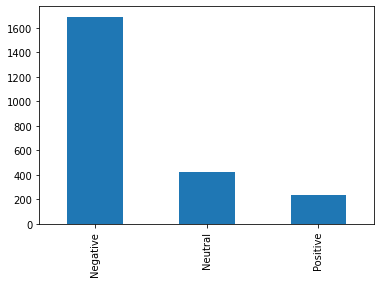

In [90]:
df.sentiment.value_counts()
df.sentiment.value_counts().plot(kind='bar')

Data Analysis

Berdasarkan hasil dari sentiment analysis terdistribusi sebagai berikut : sentiment positive sebanyak 237, sentiment negative sebanyak 1690 dan sentiment neutral sebanyak 423. Jika dibandingkan antara Positive dan Negative sentiment, maka terkait dengan key word "resesi" lebih banyak sentiment Negative.